# Explore here

In [44]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score

from pickle import dump

In [45]:
total_data = pd.read_csv('../data/processed/skin/total_clean_skinthickness_predicted.csv')
total_data

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness
0,6,148,72,0,33.6,0.627,50,1,35.000000
1,1,85,66,0,26.6,0.351,31,0,29.000000
2,8,183,64,0,23.3,0.672,32,1,21.313549
3,1,89,66,94,28.1,0.167,21,0,23.000000
4,5,116,74,0,25.6,0.201,30,0,22.358630
...,...,...,...,...,...,...,...,...,...
706,10,101,76,180,32.9,0.171,63,0,48.000000
707,2,122,70,0,36.8,0.340,27,0,27.000000
708,5,121,72,112,26.2,0.245,30,0,23.000000
709,1,126,60,0,30.1,0.349,47,1,26.708365


In [46]:
X = total_data.drop('Outcome', axis=1)  
y = total_data['Outcome'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
X_train.head(10)

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,SkinThickness
534,0,151,90,0,42.1,0.371,21,46.000000
146,1,109,56,135,25.2,0.833,23,21.000000
79,1,80,55,0,19.1,0.258,21,14.730306
633,1,107,50,0,28.3,0.181,29,19.000000
460,3,84,72,0,37.2,0.267,28,32.000000
356,5,116,74,0,32.3,0.660,35,29.000000
113,0,113,76,0,33.3,0.278,23,28.806994
57,7,114,66,0,32.8,0.258,42,30.728944
109,0,162,76,100,53.2,0.759,25,56.000000
618,10,68,106,49,35.5,0.285,47,23.000000


In [47]:
model = RandomForestClassifier(random_state=21, n_estimators=250)
model.fit(X_train, y_train) 


RandomForestClassifier(n_estimators=250, random_state=21)

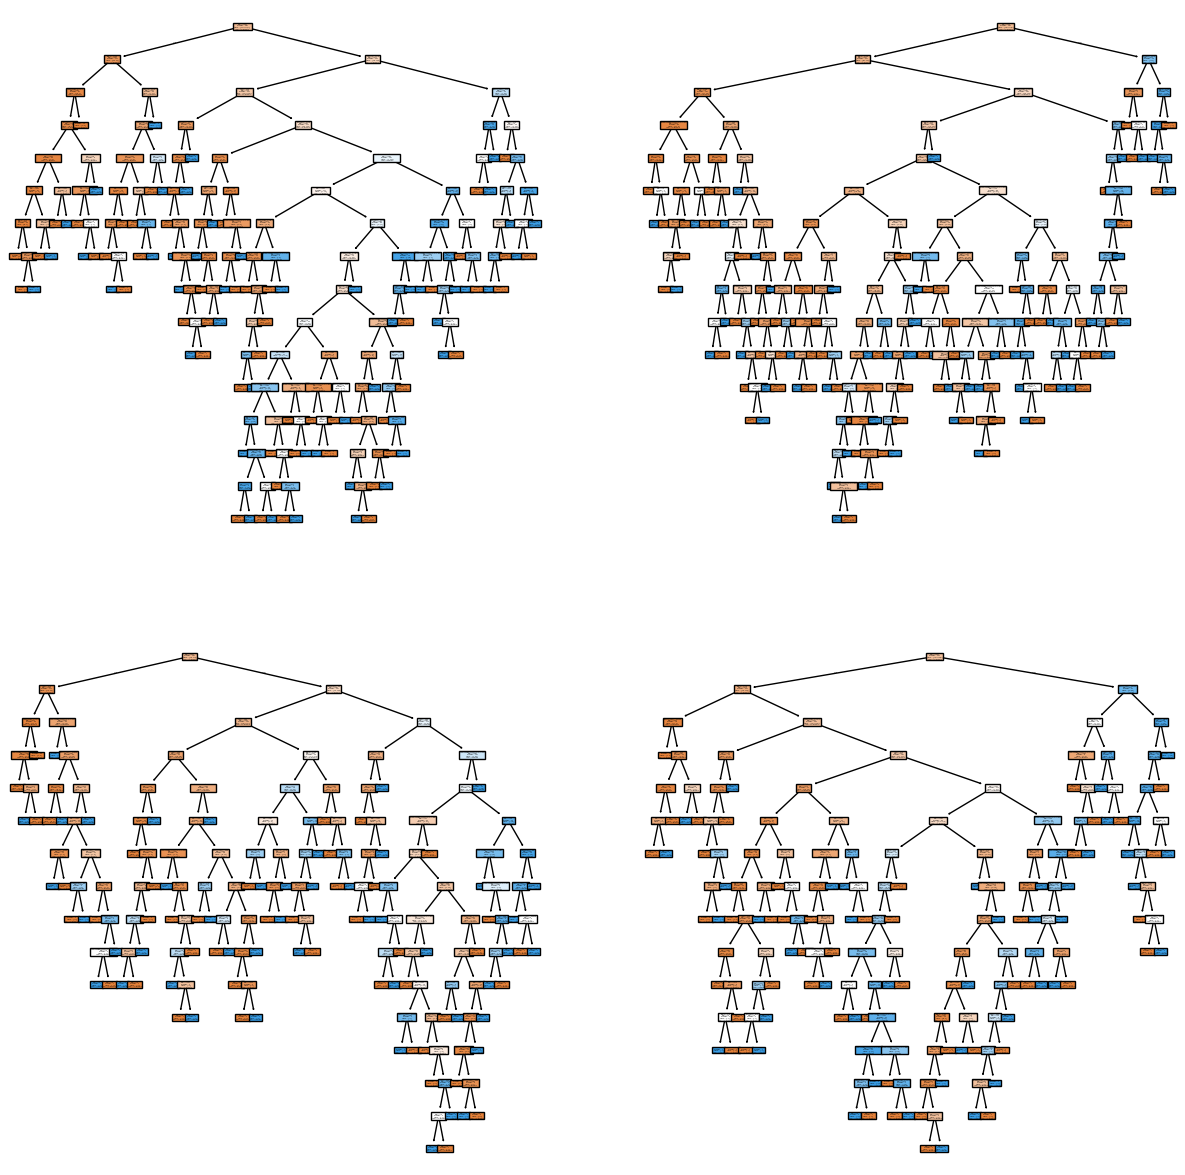

In [48]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
clases = ["No Diabetes", "Diabetes"]
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = clases, filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = clases, filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = clases, filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = clases, filled = True)

plt.show()

In [49]:
y_pred_test = model.predict(X_test)
print(y_pred_test[:10])

y_pred_train = model.predict(X_train)
print(y_pred_train[:10])

[1 0 0 0 0 0 0 0 0 1]
[1 0 0 0 0 1 1 1 1 0]


In [50]:
# evaluating the model 

# metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test)
f1_score_train = f1_score(y_train, y_pred_train)

precision_test = precision_score(y_test, y_pred_test, average='weighted')
precision_train = precision_score(y_train, y_pred_train, average='weighted')

recall_test = recall_score(y_test, y_pred_test, average='weighted')
recall_train = recall_score(y_train, y_pred_train, average='weighted')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.8041958041958042
F1 score Test:  0.6956521739130435
Precision Test:  0.8144980975169654
Recall Test:  0.8041958041958042
Accuracy Train:  1.0
F1 score Train:  1.0
Precision Train:  1.0
Recall Train:  1.0


In [51]:
print(classification_report(y_test, y_pred_test, target_names=["No diabetes", "Diabetes"]))

              precision    recall  f1-score   support

 No diabetes       0.78      0.94      0.86        88
    Diabetes       0.86      0.58      0.70        55

    accuracy                           0.80       143
   macro avg       0.82      0.76      0.78       143
weighted avg       0.81      0.80      0.79       143



### The model is clearly overfitting, as the accuracy on the training set is significantly higher than on the test set.

In [52]:
model2 = RandomForestClassifier(random_state=21, n_estimators=10000, bootstrap=True, max_depth=None, min_samples_split=6)
model2.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=6, n_estimators=10000, random_state=21)

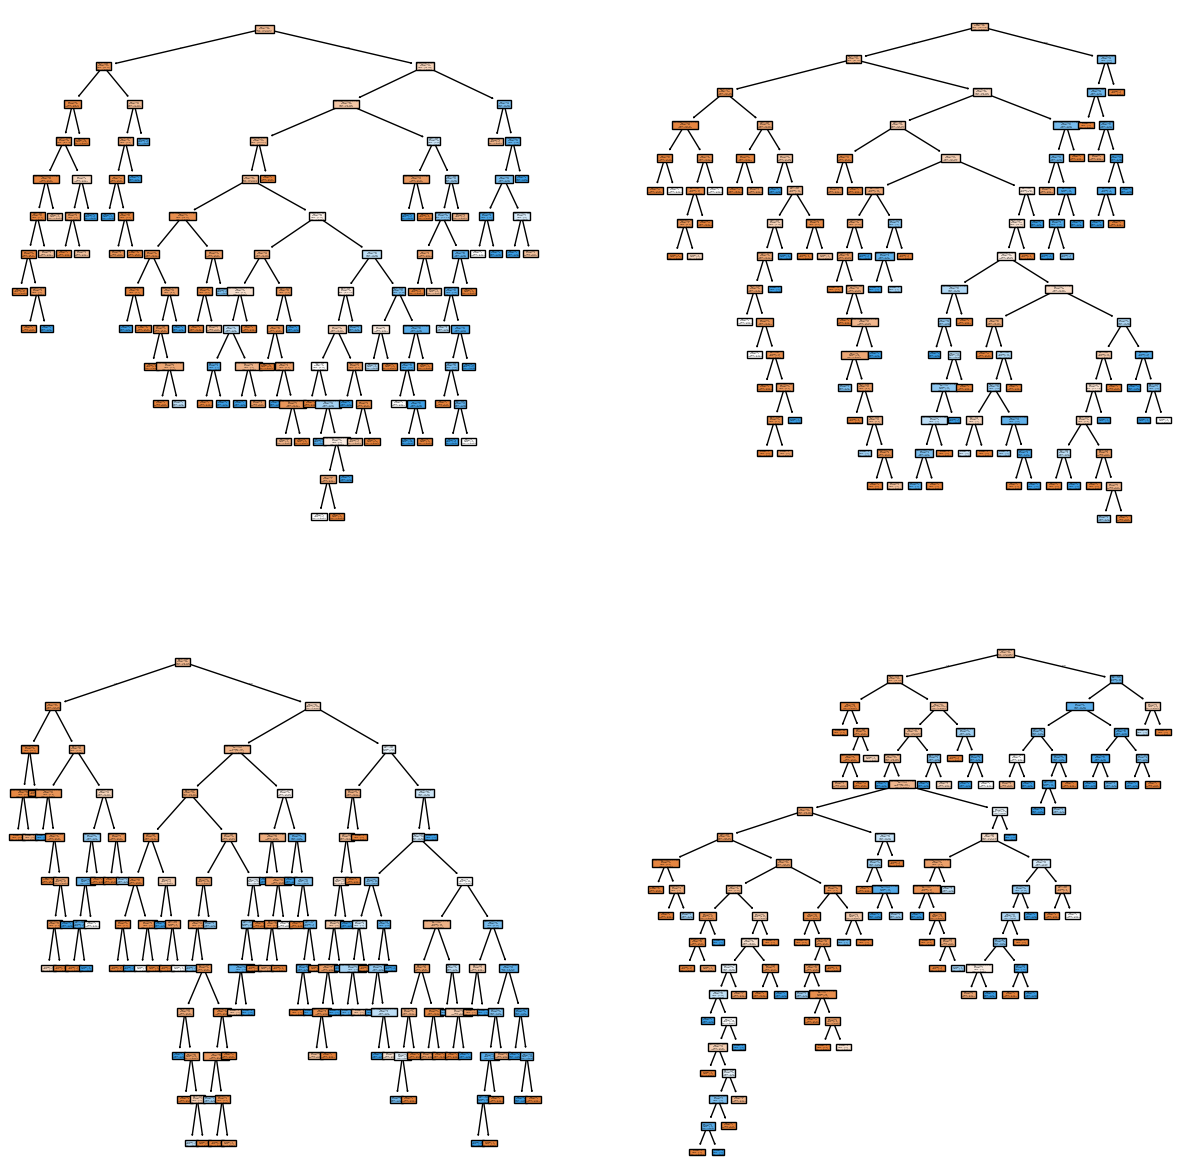

In [53]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
clases = ["No Diabetes", "Diabetes"]
tree.plot_tree(model2.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = clases, filled = True)
tree.plot_tree(model2.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = clases, filled = True)
tree.plot_tree(model2.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = clases, filled = True)
tree.plot_tree(model2.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = clases, filled = True)

plt.show()

In [54]:
y_pred_test_2 = model2.predict(X_test)
print(y_pred_test_2[:10])   

y_pred_train_2 = model2.predict(X_train)
print(y_pred_train_2[:10])

[1 0 0 0 0 0 0 0 0 1]
[1 0 0 0 0 1 1 1 1 0]


In [55]:
# evaluating model 2
accuracy_test = accuracy_score(y_test, y_pred_test_2)
accuracy_train = accuracy_score(y_train, y_pred_train_2)

f1_score_test = f1_score(y_test, y_pred_test_2, average='weighted')
f1_score_train = f1_score(y_train, y_pred_train_2, average='weighted')

precision_test = precision_score(y_test, y_pred_test_2, average='weighted')
precision_train = precision_score(y_train, y_pred_train_2, average='weighted')

recall_test = recall_score(y_test, y_pred_test_2, average='weighted')
recall_train = recall_score(y_train, y_pred_train_2, average='weighted')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)


print("")
print("Model 1: ")
print("")
print(classification_report(y_test, y_pred_test, target_names=["No diabetes", "Diabetes"]))

print("")
print("Model 2: ")
print("")
print(classification_report(y_test, y_pred_test_2, target_names=["No diabetes", "Diabetes"]))

Accuracy Test:  0.7832167832167832
F1 score Test:  0.7691956705816285
Precision Test:  0.7966499232014612
Recall Test:  0.7832167832167832
Accuracy Train:  0.9823943661971831
F1 score Train:  0.9822632818676089
Precision Train:  0.9828423467010715
Recall Train:  0.9823943661971831

Model 1: 

              precision    recall  f1-score   support

 No diabetes       0.78      0.94      0.86        88
    Diabetes       0.86      0.58      0.70        55

    accuracy                           0.80       143
   macro avg       0.82      0.76      0.78       143
weighted avg       0.81      0.80      0.79       143


Model 2: 

              precision    recall  f1-score   support

 No diabetes       0.76      0.94      0.84        88
    Diabetes       0.85      0.53      0.65        55

    accuracy                           0.78       143
   macro avg       0.81      0.74      0.75       143
weighted avg       0.80      0.78      0.77       143



### I believe this data is highly imbalanced, so I will use SMOTE to balance the dataset and apply the first model again

In [56]:
print(y_train.value_counts())

Outcome
0    383
1    185
Name: count, dtype: int64


In [57]:
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE

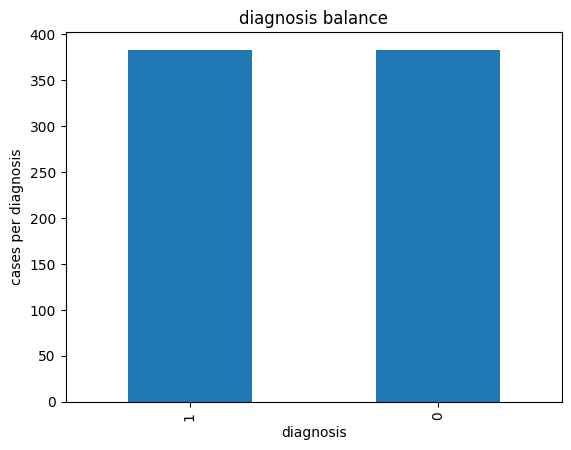

In [58]:
smote = SMOTE(random_state=21) # type: ignore
X_train2, y_train3 = smote.fit_resample(X_train, y_train)

y_train3.value_counts().plot(kind='bar')    
plt.title('diagnosis balance')
plt.xlabel('diagnosis')
plt.ylabel('cases per diagnosis')
plt.show()

In [62]:
model.fit(X_train2, y_train3)  

y_pred_test_3 = model.predict(X_test)
print(y_pred_test_3[:10])

y_pred_train_3 = model.predict(X_train)
print(y_pred_train_3[:10])




[1 1 0 1 0 0 0 0 1 1]
[1 0 0 0 0 1 1 1 1 0]


In [63]:
model2.fit(X_train2, y_train3)

y_pred_test_4 = model2.predict(X_test)
print(y_pred_test_4[:10])

y_pred_train_4 = model2.predict(X_train2)
print(y_pred_train_4[:10])

[1 1 0 1 0 1 0 0 1 1]
[1 0 0 0 0 1 1 1 1 0]


In [64]:
# evaluating model 1 with balanced data
accuracy_test = accuracy_score(y_test, y_pred_test_3)
accuracy_train = accuracy_score(y_train, y_pred_train_3)

f1_score_test = f1_score(y_test, y_pred_test_3)
f1_score_train = f1_score(y_train, y_pred_train_3)

precision_test = precision_score(y_test, y_pred_test_3)
precision_train = precision_score(y_train, y_pred_train_3)

recall_test = recall_score(y_test, y_pred_test_3)
recall_train = recall_score(y_train, y_pred_train_3)

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)



Accuracy Test:  0.8181818181818182
F1 score Test:  0.75
Precision Test:  0.7959183673469388
Recall Test:  0.7090909090909091
Accuracy Train:  1.0
F1 score Train:  1.0
Precision Train:  1.0
Recall Train:  1.0


In [65]:

print("")
print("Model 1: ")
print("")
print(classification_report(y_test, y_pred_test, target_names=["No diabetes", "Diabetes"]))

print("")
print("Model 1 (balanced data): ")
print("")
print(classification_report(y_test, y_pred_test_3, target_names=["No diabetes", "Diabetes"]))

print("")
print("Model 2: ")
print("")
print(classification_report(y_test, y_pred_test_2, target_names=["No diabetes", "Diabetes"]))

print("")
print("Model 2 (balanced data): ")
print("")
print(classification_report(y_test, y_pred_test_4, target_names=["No diabetes", "Diabetes"]))




Model 1: 

              precision    recall  f1-score   support

 No diabetes       0.78      0.94      0.86        88
    Diabetes       0.86      0.58      0.70        55

    accuracy                           0.80       143
   macro avg       0.82      0.76      0.78       143
weighted avg       0.81      0.80      0.79       143


Model 1 (balanced data): 

              precision    recall  f1-score   support

 No diabetes       0.83      0.89      0.86        88
    Diabetes       0.80      0.71      0.75        55

    accuracy                           0.82       143
   macro avg       0.81      0.80      0.80       143
weighted avg       0.82      0.82      0.82       143


Model 2: 

              precision    recall  f1-score   support

 No diabetes       0.76      0.94      0.84        88
    Diabetes       0.85      0.53      0.65        55

    accuracy                           0.78       143
   macro avg       0.81      0.74      0.75       143
weighted avg       0.8